# Time Series Forescasting

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(datetime.strptime('2018-02','%Y-%m'))

2018-02-01 00:00:00


In [3]:
sales = pd.read_csv('sales-cars.csv')
sales.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


# parse date in proper yyyy-mm-dd formate

In [4]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [5]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [6]:
sales.index[0]

Timestamp('2016-01-01 00:00:00')

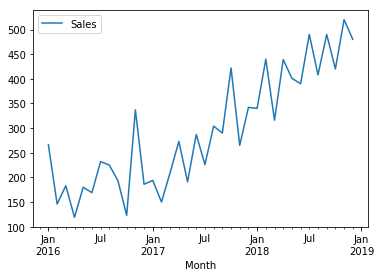

In [7]:
sales.plot()

Stationary means mean, variance and covariance is constant over periods.

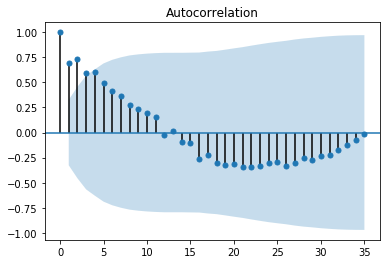

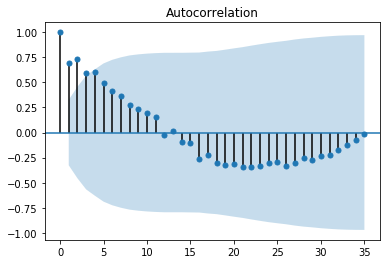

In [8]:
#ACF -> Auto Colleration Function 

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

### Converting series to stationary

In [9]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [10]:
sales.shift(1)

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


In [11]:
sales_diff = sales.diff(periods=1)
sales_diff 
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0


In [12]:
sales_diff = sales_diff[1:]
# excluding 1st record, as it has nan
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


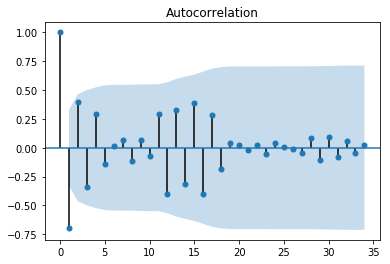

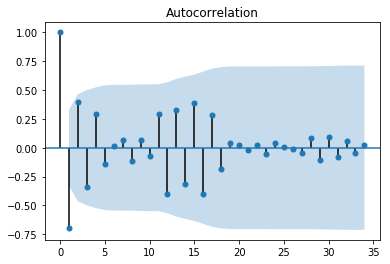

In [13]:
plot_acf(sales_diff)

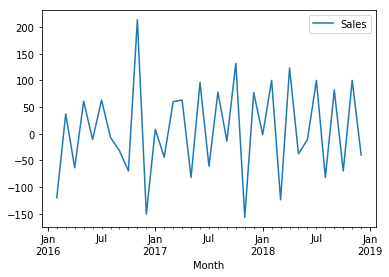

In [14]:
sales_diff.plot()

In [15]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

In [16]:
train.size

27

# Autoreggresive AR Model

In [17]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [18]:
predictions = model_ar_fit.predict(start=26,end=36)

In [19]:
test

array([[316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

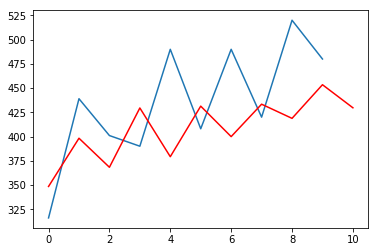

In [20]:
plt.plot(test)
plt.plot(predictions,color='red')

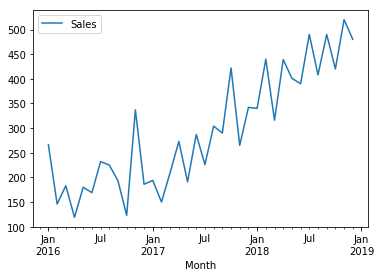

In [21]:
sales.plot()

# ARIMA model

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
#p,d,q  
# p = periods taken for autoregressive model
# d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(6, 1, 2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

297.08444818103436


In [27]:
#predictions= model_arima_fit.forecast(steps=15)[0]
predictions= model_arima_fit.forecast(steps=10)[0]

predictions

array([402.85287018, 322.91741058, 419.67758318, 392.09327768,
       441.99707072, 357.79073805, 420.61821143, 412.08339893,
       475.59043411, 423.57770959])

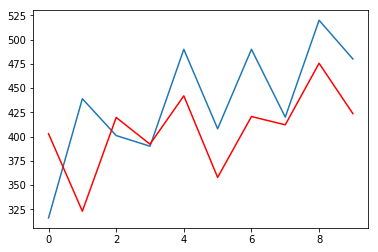

In [28]:
plt.plot(test)
plt.plot(predictions,color='red')

In [29]:
mean_squared_error(test,predictions)

3622.9263312309567

In [30]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [31]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.2506002896649
(0, 0, 3) 316.38342265642257
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.3229226907689
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(1, 0, 0) 316.16687175343054
(1, 0, 2) 310.97906422264316
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112584986
(1, 1, 2) 299.4716667063295
(1, 1, 3) 301.28511809477334
(1, 1, 4) 299.97873239729927
(1, 2, 0) 306.5307767571543
(2, 0, 0) 310.99695736763897
(2, 1, 0) 300.2089561239962
(2, 1, 1) 297.99999301674126
(2, 1, 2) 298.55054281302256
(2, 1, 3) 302.87208243829116
(2, 2, 0) 306.2975856432374
(3, 0, 0) 312.98385874204837
(3, 1, 0) 294.854358421861
(3, 1, 1) 295.99793534183914
(3, 1, 2) 292.6686238693939
(3, 1, 3) 294.65889075168616
(3, 2, 0) 299.407586815627
(3, 2, 4) 291.275046839692
(4, 0, 0) 311.07065620727724
(4, 0, 1) 321.48502440112645
(4, 1, 0) 295.93436313516304
(4, 1, 1) 297.90988170603566
(4, 1, 2) 294.66336